In [1]:
import numpy as np
from matplotlib import pyplot as plt
from blueqat import opt
Opt = opt.Opt

In [2]:
a = 100
b = 1e-2
c = 10


def get_matrix(position, velocity, a=5, b=1e-2):
    # 中心を0に近づけ、負の値を正にする
    e_p = abs(position + 0.5 )
    #e_p = 0
    #middle = c * (e_p + a*abs(velocity + b*0))
    middle = 0
    matrix = [-c*(e_p+a*abs(velocity + b * -1)) + middle, middle -c*(e_p+a*abs(velocity + b * 1))]
    return matrix

In [3]:
p = -0.57101507
v = 0.01636341
get_matrix(p,v,a,b)

[-7.073560699999998, -27.073560699999998]

In [4]:
qstr = "1e2*(1 - (q0 + q1))^2"

In [5]:
problem = Opt()
problem.add(np.diag(get_matrix(p, v, a, b))).add(qstr)

In [6]:
problem.qaoa().most_common()

(((0, 1), 0.9971593299715241),)

In [7]:
problem.run()

[0, 1]

In [8]:
problem.qubo

array([[-107.0735607,  200.       ],
       [   0.       , -127.0735607]])

In [9]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)
import gym
env = gym.make("MountainCar-v0")
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd

In [10]:
action_dict ={(1,0):0,(0,1):2}
def get_action(action_qaoa):
    return action_dict[action_qaoa]

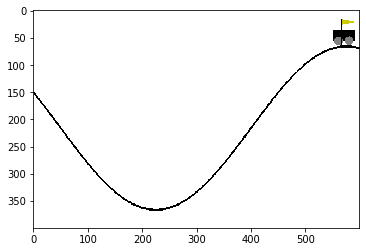

In [11]:
#ゲーム環境のリセット
observation = env.reset()

#画像の準備
fig = plt.figure()
ims = []
actions = []
missed_count = 0

#繰り返し操作して画面を表示
for i in range(200):
    p,v = observation
    
    problem = Opt()
    problem.add(np.diag(get_matrix(p, v, a, b))).add(qstr)
    
    action_qaoa = problem.qaoa().most_common()[0][0]
    while sum(action_qaoa) != 1:
        missed_count +=1
        action_qaoa = problem.qaoa().most_common()[0][0]
    
    action = get_action(action_qaoa)
    
    actions.append(action)
        
    observation, reward, done, info = env.step(action)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    if done == True:
        break

In [12]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

In [16]:
missed_count

0

In [17]:
print(actions)

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [15]:
missed_count

0

In [18]:
len(actions)

92

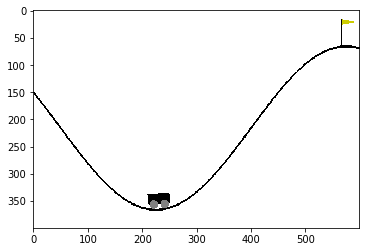

In [19]:
#ゲーム環境のリセット
observation = env.reset()

#画像の準備
fig = plt.figure()
ims = []
actions = []
missed_count = 0

#繰り返し操作して画面を表示
for i in range(200):
    p,v = observation
    
    problem = Opt()
    problem.add(np.diag(get_matrix(p, v, a, b))).add(qstr)
    
    action_qaoa = tuple(problem.run())
    while sum(action_qaoa) != 1:
        missed_count +=1
        action_qaoa = tuple(problem.run())
    
    action = get_action(action_qaoa)
    
    actions.append(action)
        
    observation, reward, done, info = env.step(action)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    if done == True:
        break

In [20]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

In [14]:
print(actions)

[2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2]
